In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(os.getcwd()[0:-11] + "\\Cleansed_data\\Cleaned_2\\cleaned_data.csv")

In [3]:
# Splitting data into 2 categories.
df_failure = df.loc[df["result1"]==0]
df_success = df.loc[df["result1"]==1]

### Grouping by

In [14]:
# Putting frequencies and means into variables.
count_success = len(df_success)
count_failure = len(df_failure)

# Frequency of education levels.
education_success = (df_success.groupby(['education']).size()/count_success).reset_index(name='frequency')
education_failure = (df_failure.groupby(['education']).size()/count_failure).reset_index(name='frequency')

# Median of views.
median_views_success = df_success["views"].median()
median_views_failure = df_failure["views"].median()

# Mean of work time and counts for group by.
avg_worktime_success = df_success["work_time"].mean()
avg_worktime_failure = df_failure["work_time"].mean()

worktime_group_count_success = (df_success.groupby(["work_time"]).size()/count_success).reset_index(name='count')
worktime_group_count_failure = (df_failure.groupby(["work_time"]).size()/count_failure).reset_index(name='count')

# Frequency of 'salary not disclosed'.
no_salary_success = len(df_success["salary"].loc[df_success["salary"] == "nie podano wynagrodzenia"])/count_success
no_salary_failure = len(df_failure["salary"].loc[df_failure["salary"] == "nie podano wynagrodzenia"])/count_failure

# Counts for vacancies group by.
vacancies_success = (df_success.groupby(["vacancies"]).size()/count_success).reset_index(name='count')
vacancies_failure = (df_failure.groupby(["vacancies"]).size()/count_failure).reset_index(name='count')

# Average length of responsibilities description.
avg_responsibility_len_success = df_success['responsibilities'].str.len().mean()
avg_responsibility_len_failure = df_failure['responsibilities'].str.len().mean()

# Average length of necessary requirements description.
avg_req_len_success = df_success['requirements1'].str.len().mean()
avg_req_len_failure = df_failure['requirements1'].str.len().mean()

### Plotting charts

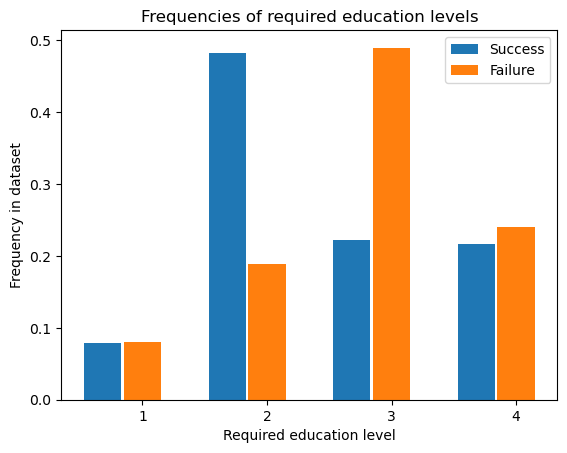

In [46]:
# Required education level comparison.
width = 0.30
plt.bar(education_success["education"]-0.16, education_success["frequency"], width, tick_label=[1,2,3,4])
plt.bar(education_failure["education"]+0.16, education_failure["frequency"], width, tick_label=[1,2,3,4])

plt.title('Frequencies of required education levels')
plt.xlabel('Required education level')
plt.ylabel('Frequency in dataset')
plt.legend(['Success', 'Failure'])

plt.show()